In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
train = pd.read_csv('train.csv', engine='python')
test = pd.read_csv('test.csv', engine = 'python')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    4052 non-null   float64
 10  겨울_구매건수    4089 non-null   float64
 11  봄_구매건수     4319 non-null   float64
 12  여름_구매건수    4009 non-null   float64
 13  아침_구매건수    3608 non-null   float64
 14  저녁_구매건수    3975 non-null   float64
 15  점심_구매건수    4861 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


In [5]:
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [20]:
train = train.fillna(0)
test = test.fillna(0)

In [17]:
def tot_item(a,b,c):
    if train['구매건수'] == a+b+c:
        return 0

In [19]:
tot_item(train['아침_구매건수'],train['점심_구매건수'],train['저녁_구매건수'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
train = train.fillna(if train['저녁_구매건수']+train['점심_구매건수']+train['아침_구매건수'] == train['구매건수'])
test = test.fillna(0)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [22]:
train_ID = train['custid']
test_id = test['custid']

train.drop('custid', axis=1, inplace=True)
test.drop('custid', axis=1, inplace=True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    5000 non-null   float64
 10  겨울_구매건수    5000 non-null   float64
 11  봄_구매건수     5000 non-null   float64
 12  여름_구매건수    5000 non-null   float64
 13  아침_구매건수    5000 non-null   float64
 14  저녁_구매건수    5000 non-null   float64
 15  점심_구매건수    5000 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


In [24]:
# 한글로 하면 계속 에러날거같으니까
# 그냥 죄다 영어로 바꾸자
# 나중에 어렵게하고싶지 않아.

train=train.rename(columns={'총구매액':'tot_price', '구매건수':'count', 
                         '평균구매가격':'avg_price', '평균할부개월수':'avg_install',
                         '구매브랜드종류':'brand_category', '내점일수':'visited', 
                         '수입상품_구매비율':'income_rate', '주말방문비율':'week_visited',
                         '가을_구매건수':'fall_count', '겨울_구매건수':'wint_count',
                         '봄_구매건수':'spring_count', '여름_구매건수':'summer_count',
                         '아침_구매건수':'morning_count', '저녁_구매건수':'night_count',
                         '점심_구매건수':'after_count', '주구매코너':'major'})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5000 non-null   int64  
 1   tot_price       5000 non-null   int64  
 2   count           5000 non-null   int64  
 3   avg_price       5000 non-null   int64  
 4   avg_install     5000 non-null   float64
 5   brand_category  5000 non-null   int64  
 6   visited         5000 non-null   int64  
 7   income_rate     5000 non-null   float64
 8   week_visited    5000 non-null   float64
 9   fall_count      5000 non-null   float64
 10  wint_count      5000 non-null   float64
 11  spring_count    5000 non-null   float64
 12  summer_count    5000 non-null   float64
 13  morning_count   5000 non-null   float64
 14  night_count     5000 non-null   float64
 15  after_count     5000 non-null   float64
 16  major           5000 non-null   object 
dtypes: float64(10), int64(6), object(

In [25]:
# 수치형으로 입력할경우 순위가 생기기떄문에 안됨
# 그래서 one-hot 인코딩으로 



train['major'].value_counts()

일반식품        1306
화장품         1206
유니캐주얼        410
유아동복         383
스포츠          301
영캐주얼         246
캐릭터캐주얼       188
수입명품         136
섬유            96
트래디셔널캐주얼      91
니트단품          91
정장셔츠          90
엘레강스캐주얼       78
피혁A           75
장신구           68
피혁B           56
디자이너부띠끄       51
문화완구          38
조리욕실          28
가전            18
기타바이어         12
도자기크리스탈       11
침구수예           8
가구             7
타운모피           6
Name: major, dtype: int64

## 'major' 코드별 의미

> 0	가구          
> 1	가전            
> 2	기타바이어         
> 3	니트단품          
> 4	도자기크리스탈       
> 5	디자이너부띠끄       
> 6	문화완구          
> 7	섬유
> 8	수입명품         
> 9	스포츠          
> 10	엘레강스캐주얼       
> 11	영캐주얼        
> 12	유니캐주얼   
> 13	유아동복        
> 14	일반식품 
> 15	장신구           
> 16	정장셔츠          
> 17	조리욕실          
> 18	침구수예        
> 19	캐릭터캐주얼       
> 20	타운모피        
> 21	트래디셔널캐주얼    
> 22	피혁A     
> 23	피혁B           
> 24	화장품 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFD75F2B88>,
      dtype=object)

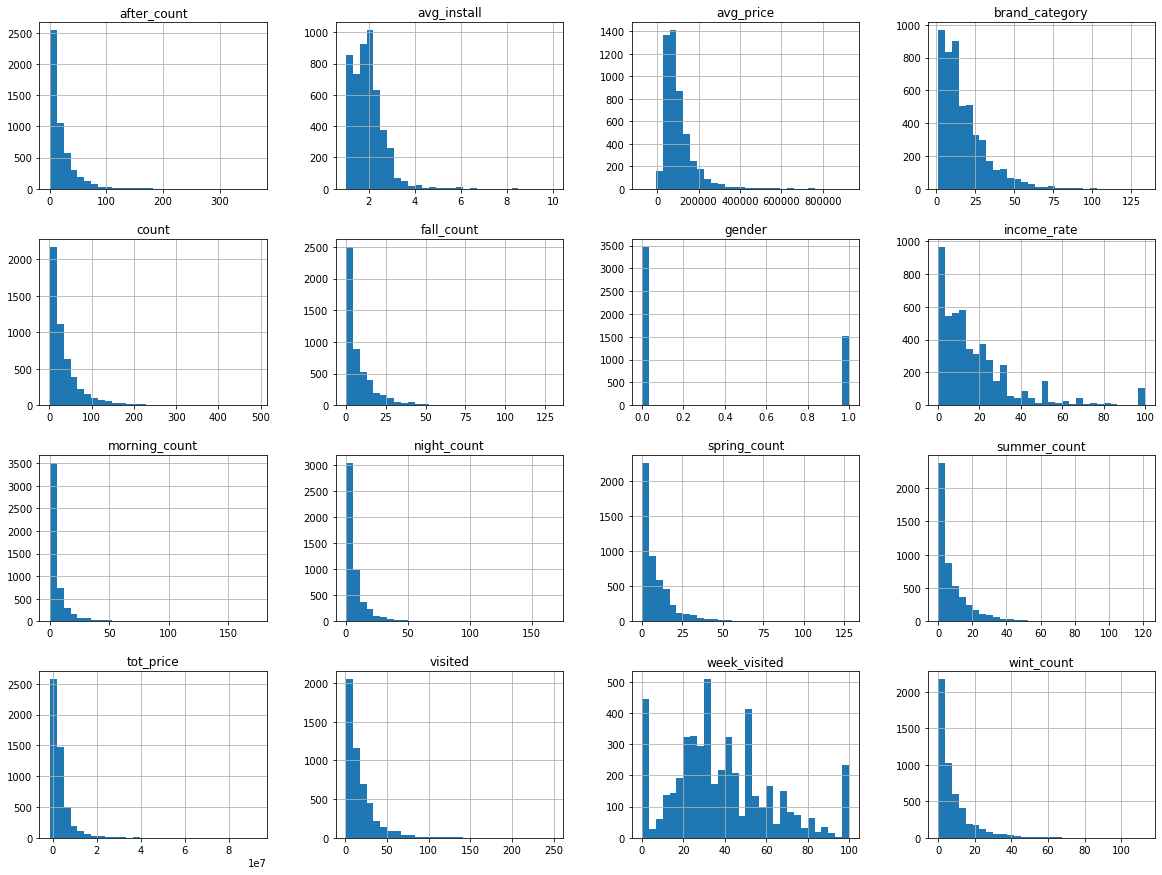

In [26]:
train.hist(bins=30, figsize=(20,15))

In [27]:
# major를 숫자화 한다
train['major'] = train['major'].astype('category')
train['major'] = train['major'].cat.codes
train['major'].value_counts()

14    1306
24    1206
12     410
13     383
9      301
11     246
19     188
8      136
7       96
21      91
3       91
16      90
10      78
22      75
15      68
23      56
5       51
6       38
17      28
1       18
2       12
4       11
18       8
0        7
20       6
Name: major, dtype: int64

In [28]:
df_corr = train.corr()
df_corr

,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,fall_count,wint_count,spring_count,summer_count,morning_count,night_count,after_count,major
gender,1.000000,0.099137,0.094022,0.072181,-0.020066,0.083988,0.084255,-0.021294,0.020457,0.088600,0.065261,0.076116,0.101900,0.127779,-0.021618,0.097237,-0.039270
tot_price,0.099137,1.000000,0.712183,0.376395,0.137335,0.714774,0.617210,-0.048053,-0.048515,0.657523,0.620446,0.635757,0.619743,0.456158,0.398494,0.709572,-0.141735
count,0.094022,0.712183,1.000000,-0.057376,-0.037878,0.869075,0.942115,-0.210022,-0.096558,0.896969,0.879652,0.895580,0.883784,0.672721,0.643764,0.945027,-0.143826
avg_price,0.072181,0.376395,-0.057376,1.000000,0.407556,0.002931,-0.091136,0.189608,0.036426,-0.036019,-0.052918,-0.048857,-0.064851,-0.040362,-0.092749,-0.028726,-0.044333
avg_install,-0.020066,0.137335,-0.037878,0.407556,1.000000,-0.002074,-0.076343,0.097727,-0.001625,-0.018789,-0.039526,-0.033855,-0.041831,-0.047450,-0.051170,-0.014389,-0.021258
brand_category,0.083988,0.714774,0.869075,0.002931,-0.002074,1.000000,0.780303,-0.234547,-0.080674,0.777740,0.774681,0.784562,0.755035,0.582657,0.578552,0.813712,-0.166345
visited,0.084255,0.617210,0.942115,-0.091136,-0.076343,0.780303,1.000000,-0.225363,-0.114795,0.843133,0.836375,0.843763,0.827751,0.638138,0.634809,0.875888,-0.136688
income_rate,-0.021294,-0.048053,-0.210022,0.189608,0.097727,-0.234547,-0.225363,1.000000,0.016123,-0.183411,-0.185994,-0.193382,-0.184013,-0.133133,-0.170649,-0.186310,0.277087
week_visited,0.020457,-0.048515,-0.096558,0.036426,-0.001625,-0.080674,-0.114795,0.016123,1.000000,-0.084014,-0.071125,-0.093424,-0.092989,-0.113193,-0.006852,-0.094814,0.064942
fall_count,0.088600,0.657523,0.896969,-0.036019,-0.018789,0.777740,0.843133,-0.183411,-0.084014,1.000000,0.729604,0.732474,0.735223,0.607713,0.572024,0.848190,-0.119888


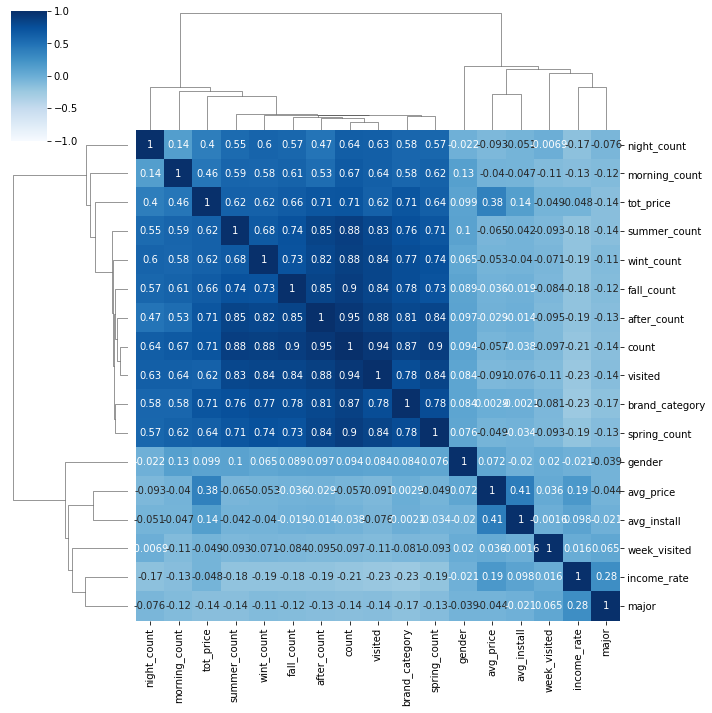

In [29]:
import seaborn as sns
df_mapping = sns.clustermap(df_corr, cbar = True, 
                            annot=True,
                            cmap = 'Blues',
                            vmin=-1, vmax=1)

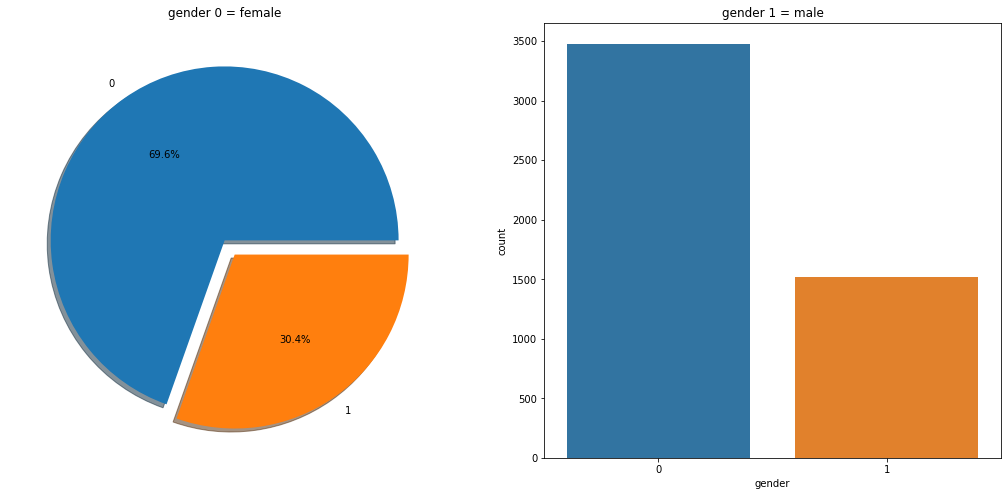

In [30]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('gender 0 = female')
ax[0].set_ylabel('')
sns.countplot('gender',data=train,ax=ax[1])
ax[1].set_title('gender 1 = male')
plt.show()

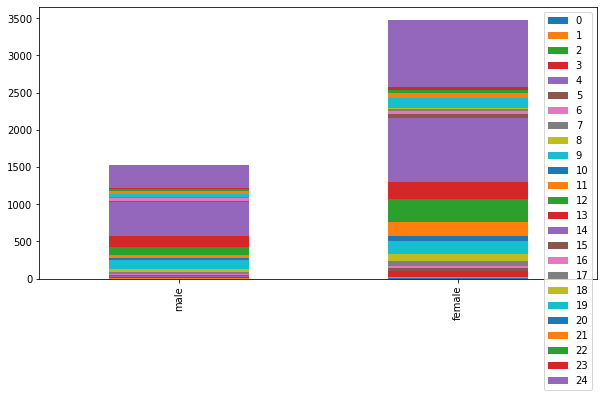

In [31]:
def bar_chart(feature):
    male = train[train['gender']==1][feature].value_counts()
    female = train[train['gender']==0][feature].value_counts()

    df = pd.DataFrame([male,female])
    df.index = ['male', 'female']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
bar_chart('major')

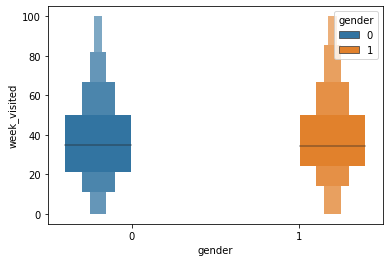

In [32]:
sns.boxenplot(x="gender", y="week_visited", hue="gender",data=train)

plt.show()

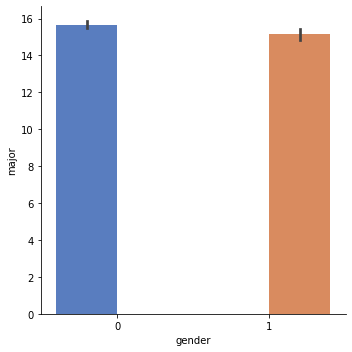

In [33]:
sns.catplot(x="gender", y="major", hue="gender",kind="bar",palette="muted",data=train)

plt.show()

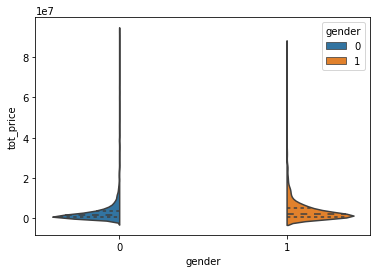

In [34]:
sns.violinplot(x="gender", y="tot_price",split=True, inner="quart", hue="gender",data=train)

plt.show()

In [35]:
pd.crosstab(train.major,train.gender,margins=True).style.background_gradient(cmap='summer_r')

gender,0,1,All
major,,,
0,6,1,7
1,13,5,18
2,9,3,12
3,74,17,91
4,6,5,11
5,38,13,51
6,21,17,38
7,75,21,96
8,85,51,136


In [ ]:
train

In [ ]:
def 
for i in major
    if gender == 0


In [ ]:
train['수입품총가격'] = np.where((train['income_rate']!=0),
                                (train['income_rate']* train['tot_price']) / 100, 0)

In [ ]:
train

In [ ]:
train['major'].value_counts()

In [ ]:
#major 를 one hot으로
train = pd.get_dummies(train, columns=['major'])

In [ ]:
train.info()

In [ ]:
train.head()

In [ ]:
# 노멀라이징
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

In [ ]:
x = scaler.transform(train)
train_s = pd.DataFrame(x, columns=train.columns)

In [ ]:
train_s

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dfX = train_s.drop(['gender','summer_count','spring_count','wint_count',], axis=1)
dfy = train_s['gender']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state = 0)


In [ ]:
display(X_train.shape, X_test.shape)
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import mglearn

kn_model = KNeighborsClassifier(n_neighbors=3)
lg_model = LogisticRegression()
dt_model = DecisionTreeClassifier(max_depth=6, random_state=0)
grad_model = GradientBoostingClassifier()

In [ ]:
kn_model.fit(X_train, y_train)
display(kn_model.score(X_train, y_train))
display(kn_model.score(X_test, y_test))

In [ ]:
lg_model.fit(X_train, y_train)
display(lg_model.score(X_train, y_train))
display(lg_model.score(X_test, y_test))

In [ ]:
dt_model.fit(X_train, y_train)
display(dt_model.score(X_train, y_train))
display(dt_model.score(X_test, y_test))

In [ ]:
grad_model =GradientBoostingClassifier(n_estimators=10000, max_depth=0.01)
grad_model.fit(X_train,y_train)
train_score = grad_model.score(X_train, y_train)
test_score = grad_model.score(X_test, y_test)
display(train_score, test_score)

In [ ]:
from sklearn.svm import SVC 
svm = SVC(random_state=0) #svc 형으로 학습을 시켰다
svm.fit(X_train, y_train)

In [ ]:
#Assess Model
# 5. Evaluate the estimator
# 
display(svm.score(X_train, y_train))
display(svm.score(X_test, y_test))

In [ ]:
sns.boxplot(x="gender", y="avg_price", hue="gender",data=train)

plt.show()

In [ ]:
#outlier detect + remove using z-series

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train))
print(z)

In [ ]:
threshold = 4
print(np.where(z > 4))

In [ ]:
print(z[55][1])

In [ ]:
train_1 = train[(z < 4).all(axis=1)]

In [ ]:
train_1.shape